<h1><span style="color:red">Descriptive Statistics for Numeric Variables</span></h1>
### This sample notebook reads numeric variables from survey dataset and computes several descriptive statistics

## 1. Retrieve survey parameters from the URL

In [25]:
%%javascript
function getQueryStringValue (key)
{  
    return unescape(window.location.search.replace(new RegExp("^(?:.*[&\\?]" + escape(key).replace(/[\.\+\*]/g, "\\$&") + "(?:\\=([^&]*))?)?.*$", "i"), "$1"));
}
IPython.notebook.kernel.execute("survey_url='".concat(getQueryStringValue("surveyurl")).concat("'"));
IPython.notebook.kernel.execute("views='".concat(getQueryStringValue("views")).concat("'"));
IPython.notebook.kernel.execute("view='".concat(getQueryStringValue("view")).concat("'"));
IPython.notebook.kernel.execute("user='".concat(getQueryStringValue("user")).concat("'"));
IPython.notebook.kernel.execute("csv_file='".concat(getQueryStringValue("csv")).concat("'")); 
IPython.notebook.kernel.execute("dzc_file='".concat(getQueryStringValue("dzc")).concat("'")); 
IPython.notebook.kernel.execute("params='".concat(getQueryStringValue("params")).concat("'")); 
IPython.notebook.kernel.execute("active_object='".concat(getQueryStringValue("activeobject")).concat("'")); 
IPython.notebook.kernel.execute("full_notebook_url='" + window.location + "'"); 

<IPython.core.display.Javascript object>

## 2. Read the survey file and extract numeric variables

In [26]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
import os
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

absolutePath = "../../temp_csvs/"

# read the csv file
file = open(absolutePath + csv_file, encoding="latin-1")
# print(absolutePath + csv_file)
df = pd.read_csv(file)

# create a list of variable names
variables_df = pd.DataFrame({'varname':df.columns})
printmd("<b><span style='color:red'>All variables in the survey file:</span></b>")
print(variables_df.varname.values)

#create a dataframe of only #number variables
nums_df = df[[n for n in variables_df.varname.values if '#number' in n]]

# create a dictionary of #number variables with abbreviated and full variable names 
var_list = {n[:n.index('#')]:n for n in variables_df.varname.values if '#number' in n}
printmd("<b><span style='color:red'>Numeric variables:</span></b>")
print(var_list)


<b><span style='color:red'>All variables in the survey file:</span></b>

['Index#number #hidden' 'ZipCode' 'BreedName' 'weight#number' '#img'
 'median_income#number' 'FELONY#number' 'MISDEMEANOR#number'
 'num_crimes#number' 'price#number' '#name' 'geometry#hiddenmore']


<b><span style='color:red'>Numeric variables:</span></b>

{'price': 'price#number', 'median_income': 'median_income#number', 'Index': 'Index#number #hidden', 'MISDEMEANOR': 'MISDEMEANOR#number', 'num_crimes': 'num_crimes#number', 'weight': 'weight#number', 'FELONY': 'FELONY#number'}


## 3. Matrix of scatterplots

- Select variables for the scatterplots in the first cell
- Generate the scatterplots in the second cell

In [69]:
# 3.1 Choose variables for scattermatrix

#creating widgets
wlist = []
i = 0

while i < 5 and i < len(var_list):
    wlist.append(widgets.Dropdown(options=var_list.keys(), value = list(var_list.keys())[i], description = str(i+1) + ":"))
    i += 1
  
printmd("<b><span style='color:red'>Select variables for scatter matrix plotting, then run the next cell</span></b>")

for n in wlist:
    display(n)

<b><span style='color:red'>Select variables for scatter matrix plotting, then run the next cell</span></b>

Dropdown(description='1:', options=('price', 'median_income', 'Index', 'MISDEMEANOR', 'num_crimes', 'weight', …

Dropdown(description='2:', index=1, options=('price', 'median_income', 'Index', 'MISDEMEANOR', 'num_crimes', '…

Dropdown(description='3:', index=2, options=('price', 'median_income', 'Index', 'MISDEMEANOR', 'num_crimes', '…

Dropdown(description='4:', index=3, options=('price', 'median_income', 'Index', 'MISDEMEANOR', 'num_crimes', '…

Dropdown(description='5:', index=4, options=('price', 'median_income', 'Index', 'MISDEMEANOR', 'num_crimes', '…

<br><b><span style='color:red'>Scatter matrix for the selected variables</span></b>

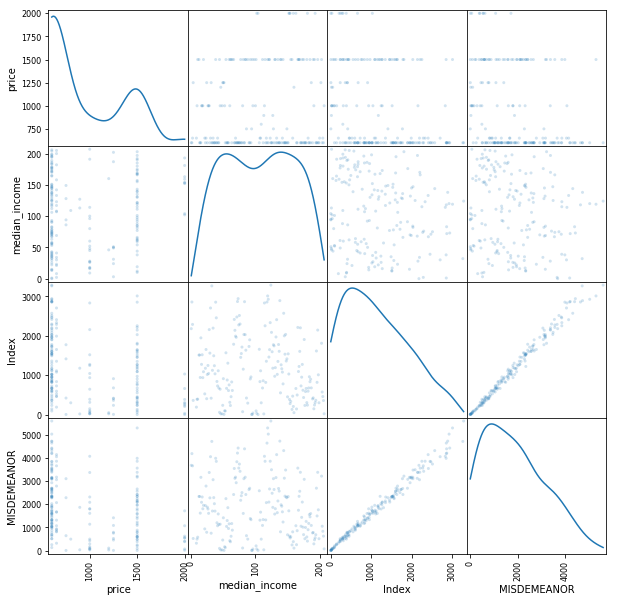

In [78]:
# 3.2 Create the scattermatrix

#scattermatrix
scat_df = df[[var_list[n.value] for n in wlist]]

#check if variables different
if len(list(scat_df)) != len(set(list(scat_df))):
    printmd("<b><span style='color:red'>Make sure all selected variables are different, then rerun this cell</span></b>")
else:
    #plot
    printmd("<br><b><span style='color:red'>Scatter matrix for the selected variables</span></b>")

    wot = pd.plotting.scatter_matrix(scat_df, alpha=0.2, figsize=(10, 10), diagonal='kde')
    #axis
    for n in range(len(wot)):
        for j in range(len(wot)):
            ax = wot[n, j]
            ax.set(xlabel=wlist[j].value, ylabel=wlist[n].value)

## 4. Scatterplot and linear regression

- Select variables for the regression in the first cell
- Generate the plot in the second cell

In [84]:
# 4.1 Choose the variables for the scatterplot

#creating widgets
a4 = widgets.Dropdown(options=var_list.keys(), value = list(var_list.keys())[0], description = "x:")
b4 = widgets.Dropdown(options=var_list.keys(), value = list(var_list.keys())[1], description = "y:")
ui = widgets.VBox([a4, b4])
def f4(a, b):
    return ((a, b))

printmd("<b><span style='color:red'>Select x and y variables for plotting, then run the next cell</span></b>")

formula = widgets.interactive_output(f4, {'a': a4, 'b': b4})

display(ui, formula)


<b><span style='color:red'>Select x and y variables for plotting, then run the next cell</span></b>

Output()

<b><span style='color:red'><br>Scatterplot with regression line and confidence intervals:</span></b>

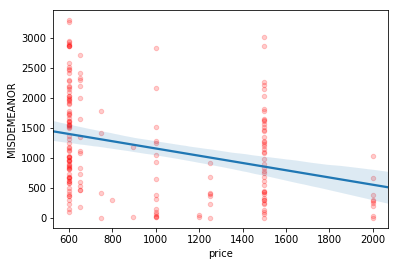

In [86]:
# 4.2 Create the scatterplot and regression line

x4 = df[var_list[a4.value]].tolist()
y4 = df[var_list[b4.value]].tolist()

# check if variables different
if a4.value == b4.value:
    printmd("<b><span style='color:red'>Make sure the selected variables are different, then rerun this cell</span></b>")

else:
    try:
        printmd("<b><span style='color:red'><br>Scatterplot with regression line and confidence intervals:</span></b>")
        ax = sb.regplot(var_list[a4.value], var_list[b4.value], df, scatter_kws={"s": 20, "color" : "red", "alpha" : "0.2"})
        #axis
        ax.set(xlabel=a4.value, ylabel=b4.value)
        plt.show()
    except:
        printmd("<b><span style='color:red'>Cannot plot. One or both variables contain non-numeric values!!</span></b>")

#adding the log regline
#fitl = np.polyfit(np.log(x), y, 1).tolist()
#x.sort()
#y1 = [np.log(i)*fitl[0] + fitl[1] for i in x]
#plt.plot(x, y1, "-r")

#end plot

## 5. Mean, standard deviation, skew, etc...

- Select a variable in the first cell
- Generate statistics in the second cell

In [87]:
# 5.2 Choose the variable to calculate descriptive statistics

# creating widgets
a5 = widgets.Dropdown(options=var_list.keys(), description = "Variable:")
ui = widgets.VBox([a5])
def f5(a):
    return (a)

printmd("<b><span style='color:red'><br>Select variable for descriptive statistics, then run the next cell</span></b>")

formula = widgets.interactive_output(f5, {'a': a5})

display(ui, formula)

<b><span style='color:red'><br>Select variable for descriptive statistics, then run the next cell</span></b>

Output()

Mean of variable   : 1178.5108695652175
Standard deviation : 843.973285705793
Variance           : 712290.9069850321
Skew               : 0.5366292102180446
Histogram          :


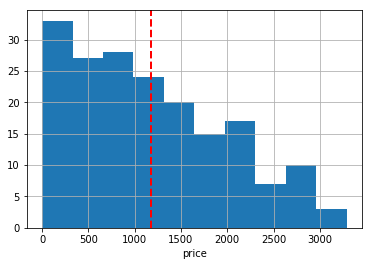

In [90]:
# 5.2 Show the descriptive statistics

try:
    # calculating descriptive stats
    var = df[var_list[a5.value]]
    vmean = var.mean()
    vsd = var.std()
    vskew = var.skew()
    vvar = var.var()

    # printing descriptive stats
    print("Mean of variable   : " + str(vmean))
    print("Standard deviation : " + str(vsd))
    print("Variance           : " + str(vvar))
    print("Skew               : " + str(vskew))

    # plot
    print("Histogram          :")
    ax = var.hist()
    # axis
    ax.set(xlabel=a.value)
    noout = plt.axvline(vmean, color='red', linestyle='dashed', linewidth=2)
except:
    printmd("<b><span style='color:red'>Cannot compute. The variable contains non-numeric values!!</span></b>")


## 6. Generate a new statistical variable to add to SuAVE

- select a variable and an operation in the first cell
- edit variable name in the second cell
- compute the new variable in the third cell

In [91]:
# 6.1 Select a variable for processing

a6 = widgets.Dropdown(options=var_list.keys())
b6 = widgets.Dropdown(options=['Number of SDs', 'Abs dist from mean'])
ui = widgets.VBox([a6, b6])
def f6(a, b):
    return ((a, b))

formula = widgets.interactive_output(f6, {'a': a6, 'b': b6})

printmd("<b><span style='color:red'><br>Select a variable and a derivative to create, then run the next cell</span></b>")

display(ui, formula)

<b><span style='color:red'><br>Select a variable and a derivative to create, then run the next cell</span></b>

Output()

In [94]:
# 6.2 Give a name to the new variable

def f62(Var_Name):
    return Var_Name
if b6.value == "Abs dist from mean":
    newvar = interact(f62, Var_Name= "ADFM" + " on " + a6.value +'#number')
elif b6.value == "Number of SDs":
    newvar = interact(f62, Var_Name= "NSD" + " for " + a6.value +'#number')
    
printmd("<b><span style='color:red'>After defining variable name hit Enter, then run the next cell</span></b>")


interactive(children=(Text(value='NSD for median_income#number', description='Var_Name'), Output()), _dom_clas…

<b><span style='color:red'>After defining variable name hit Enter, then run the next cell</span></b>

In [95]:
# 6.3 Compute the new variable and format it for SuAVE

try: 
    mean = df[var_list[a6.value]].mean()
    std = df[var_list[a6.value]].std()

    if b6.value == 'Abs dist from mean':
        df[newvar.widget.result] = [abs(i - mean) if not math.isnan(i) else pd.np.nan for i in df[var_list[a6.value]]]
    elif b6.value == 'Number of SDs':
        df[newvar.widget.result] = [math.ceil(abs(i - mean) / std) if not math.isnan(i) else pd.np.nan for i in df[var_list[a6.value]]]


    # make sure there are no illegal NaN type values in this #number variable
    df[newvar.widget.result].fillna('',inplace=True)
    df[newvar.widget.result] = pd.to_numeric(df[newvar.widget.result], errors='coerce', downcast='float')
    df[newvar.widget.result] = df[newvar.widget.result].apply(lambda x: '{:.6f}'.format(x))
    df.replace(['None', 'nan'], pd.np.nan, inplace=True)
    printmd("<b><span style='color:red'>New variable computed</span></b>")

except:
    printmd("<b><span style='color:red'>Cannot compute. The variable contains non-numeric values!!</span></b>")


<b><span style='color:red'>Cannot compute. The variable contains non-numeric values!!</span></b>

## 7. Save the new version of CSV file, and give a name to new survey

In [64]:
# new filename
new_file = absolutePath + csv_file[:-4]+'_v1.csv'
printmd("<b><span style='color:red'>A new temporary file will be created at: </span></b>")
print(new_file)
df.to_csv(new_file, index=None)

<b><span style='color:red'>A new temporary file will be created at: </span></b>

../../temp_csvs/ilyaj_hetsvi2_v1.csv


In [65]:
#Input survey name

from IPython.display import display
input_text = widgets.Text()
output_text = widgets.Text()

def bind_input_to_output(sender):
    output_text.value = input_text.value

# Tell the text input widget to call bind_input_to_output() on submit
input_text.on_submit(bind_input_to_output)

printmd("<b><span style='color:red'>Input survey name here, press Enter, and then run the next cell:</span></b>")
# Display input text box widget for input
display(input_text)

display(output_text)


<b><span style='color:red'>Input survey name here, press Enter, and then run the next cell:</span></b>

Text(value='')

Text(value='')

In [66]:
#Print survey name
survey_name = output_text.value
printmd("<b><span style='color:red'>Survey Name is: </span></b>" + survey_name)

<b><span style='color:red'>Survey Name is: </span></b>dod3

## 8. Generate the survey and create survey URL

In [67]:
referer = survey_url.split("/main")[0] +"/"
upload_url = referer + "uploadCSV"
new_survey_url_base = survey_url.split(user)[0]

import requests
import re
csv = {"file": open(new_file, "rb")}
upload_data = {
    'name': input_text.value,
    'dzc': dzc_file,
    'user':user
}
headers = {
    'User-Agent': 'suave user agent',
    'referer': referer
}

r = requests.post(upload_url, files=csv, data=upload_data, headers=headers)

if r.status_code == 200:
    printmd("<b><span style='color:red'>New survey created successfully</span></b>")
    regex = re.compile('[^0-9a-zA-Z_]')
    s_url = survey_name
    s_url =  regex.sub('_', s_url)

    url = new_survey_url_base + user + "_" + input_text.value + ".csv" + "&views=" + views + "&view=" + view
    print(url)
    printmd("<b><span style='color:red'>Click the URL to open the new survey</span></b>")
else:
    printmd("<b><span style='color:red'>Error creating new survey. Check if a survey with this name already exists.</span></b>")
    printmd("<b><span style='color:red'>Reason: </span></b>"+ str(r.status_code) + " " + r.reason)



<b><span style='color:red'>New survey created successfully</span></b>

https://suave-dev.sdsc.edu/main/file=ilyaj_dod3.csv&views=1110101&view=grid


<b><span style='color:red'>Click the URL to open the new survey</span></b>